In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #importando autocorrelaçao total e parcial

plt.style.use("ggplot")

###Geral

In [ ]:
dados.columns

Index(['Unnamed: 0', 'code', 'name', 'theme', 'source', 'freq', 'lastupdate',
       'status'],
      dtype='object')

In [ ]:
dados.status.value_counts()

Active      4207
Inactive    3331
Name: status, dtype: int64

In [ ]:
dados.freq.value_counts(normalize=True)

Monthly           0.383470
Yearly            0.351827
Quarterly         0.101801
Quadrennial       0.073072
Decennial         0.069741
Irregular         0.008327
Daily             0.004892
Quinquennial      0.003539
Not applicable    0.003331
Name: freq, dtype: float64

In [ ]:
dados.theme.value_counts()

Macroeconomic    7538
Regional         1362
Social            707
Name: theme, dtype: int64

In [ ]:
dados.source.value_counts()[0:10]

IPEA                            774
TSE                             702
IPEA/ADH Censo IBGE             548
MDIC/SECEX Países               504
Funcex                          476
FMI/WEO                         468
IBGE                            420
FMI/IFS                         415
Bacen/Notas Imprensa/F. Púb.    392
Bacen/BP (BPM5)                 378
Name: source, dtype: int64

In [ ]:
dados.source.value_counts()

##Usando a Biblioteca

In [ ]:
#!pip install ipeadatapy
import ipeadatapy as ip

###Específicos

IGP_INCCG

IGP12_INCC1012

IGP12_INCC12

IGP12_INCCG12

IGP12_INCCMG12

IGP12_INCCMG1D12

IGP12_INCCMG2D12

####IGP_INCCG

<Axes: xlabel='DATE'>

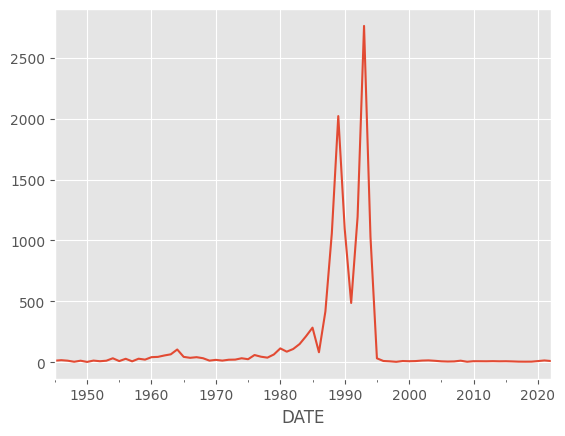

In [ ]:
ip.timeseries("IGP_INCCG")
IGP_INCCG = ip.timeseries("IGP_INCCG")

IGP_INCCG["VALUE ((% a.a.))"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

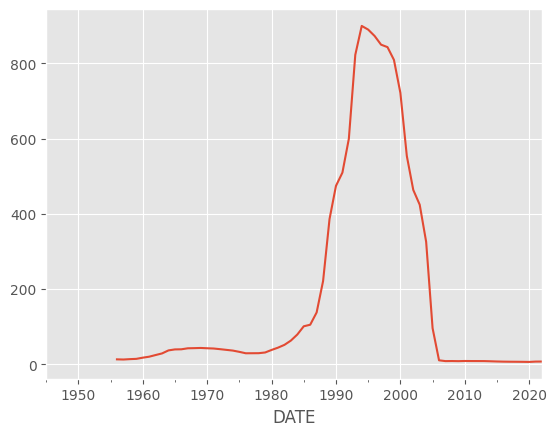

In [ ]:
IGP_INCCG["VALUE ((% a.a.))"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP_INCCG["VALUE ((% a.a.))"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

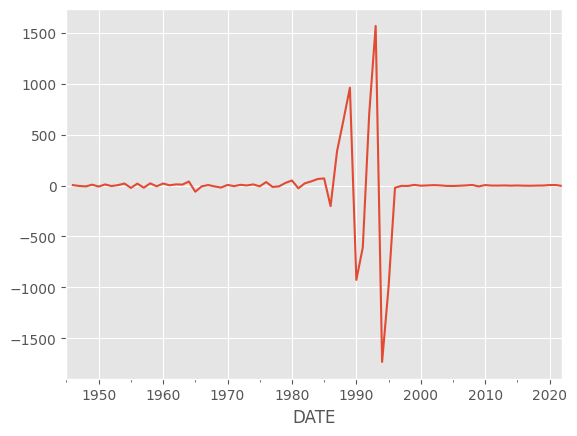

In [ ]:
IGP_INCCG["VALUE ((% a.a.))"].diff()

IGP_INCCG["VALUE ((% a.a.))"].diff().plot()

Comportamento Sazonal por mês

- Nesse caso, a base so estava anual, portanto sem analises mensais

In [ ]:
#IGP_INCCG["VALUE ((% a.a.))"].diff().groupby(IGP_INCCG.index.month).mean().plot(kind='bar')


1945    1
1994    1
2001    1
2000    1
1999    1
       ..
1970    1
1969    1
1968    1
1967    1
2022    1
Name: YEAR, Length: 78, dtype: int64

Autocorrelação Total e Parcial

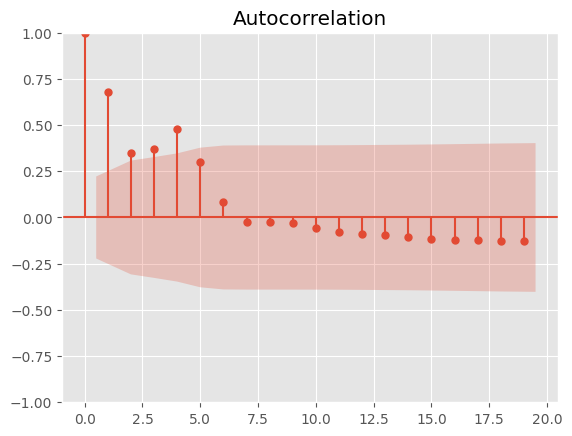

In [ ]:
plot_acf(IGP_INCCG["VALUE ((% a.a.))"])
plt.show()

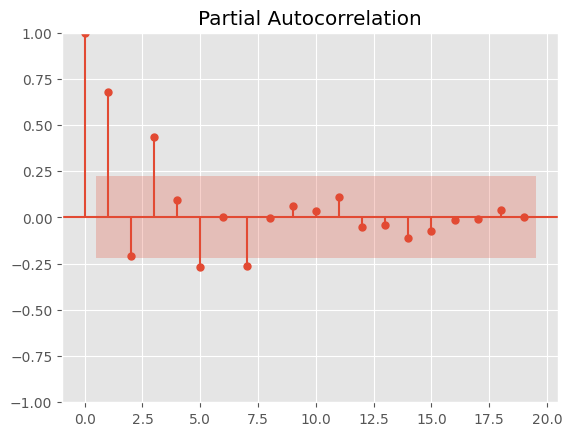

In [ ]:
plot_pacf(IGP_INCCG["VALUE ((% a.a.))"])
plt.show()

Percebe-se que o lag 1 eh significante (acima de 0,5), entao poderiamos usar um modelo autoregressivo com $p = 1$ (https://www.youtube.com/watch?v=OLAfJakUHbs)

####IGP12_INCC1012

<Axes: xlabel='DATE'>

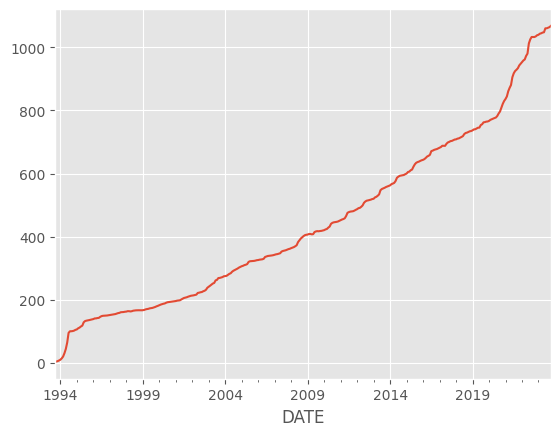

In [ ]:
ip.timeseries("IGP12_INCC1012")
IGP12_INCC1012 = ip.timeseries("IGP12_INCC1012")

IGP12_INCC1012.columns

IGP12_INCC1012["VALUE (-)"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

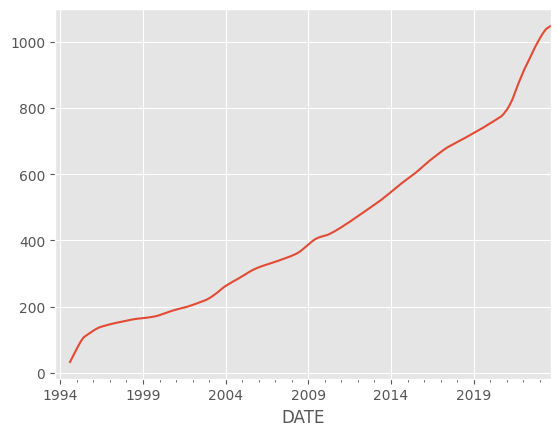

In [ ]:
IGP12_INCC1012["VALUE (-)"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP12_INCC1012["VALUE (-)"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

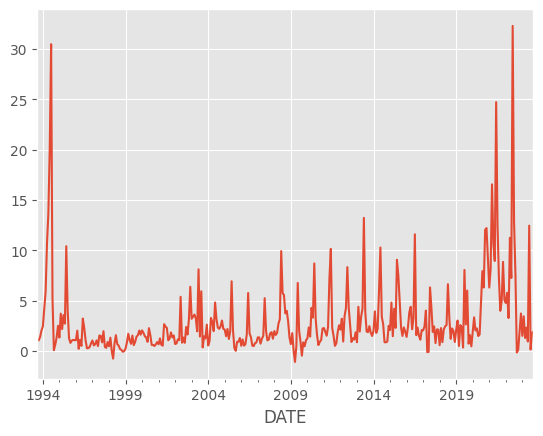

In [ ]:
IGP12_INCC1012["VALUE (-)"].diff()

IGP12_INCC1012["VALUE (-)"].diff().plot()

Comportamento Sazonal por mês

<Axes: xlabel='DATE'>

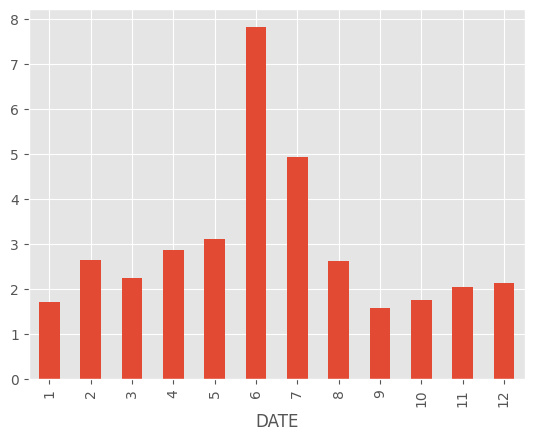

In [ ]:
IGP12_INCC1012["VALUE (-)"].diff().groupby(IGP12_INCC1012.index.month).mean().plot(kind='bar')

Autocorrelação Total e Parcial

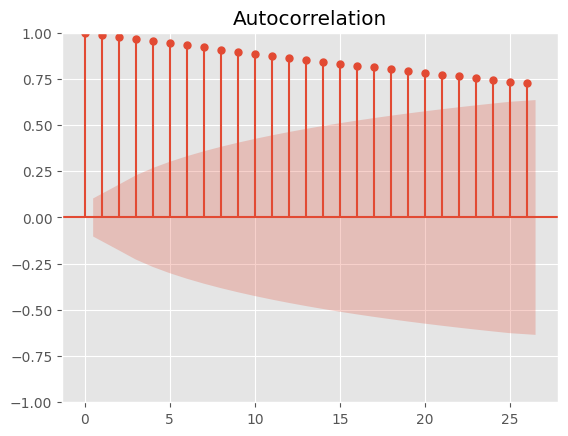

In [ ]:
plot_acf(IGP12_INCC1012["VALUE (-)"])
plt.show()

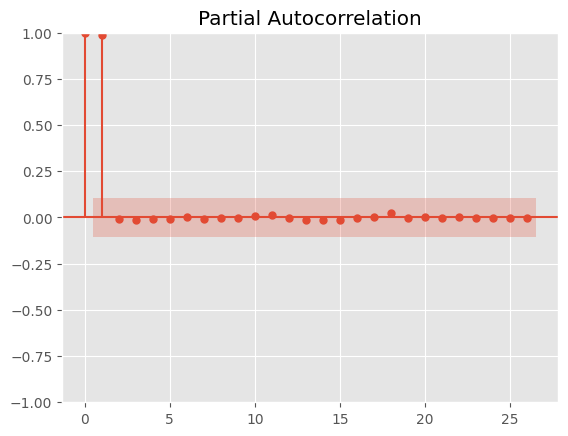

In [ ]:
plot_pacf(IGP12_INCC1012["VALUE (-)"])
plt.show()

####IGP12_INCC12

<Axes: xlabel='DATE'>

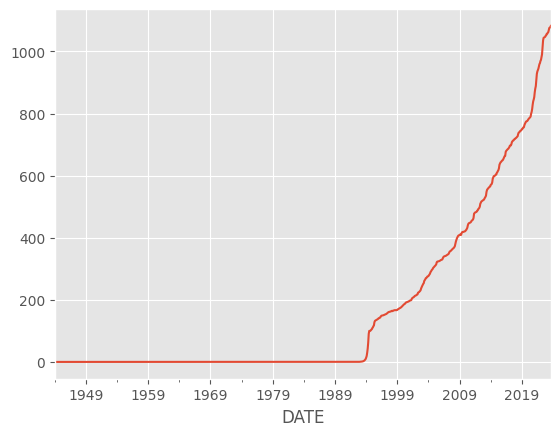

In [ ]:
ip.timeseries("IGP12_INCC12")
IGP12_INCC12 = ip.timeseries("IGP12_INCC12")

IGP12_INCC12.columns

IGP12_INCC12["VALUE (-)"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

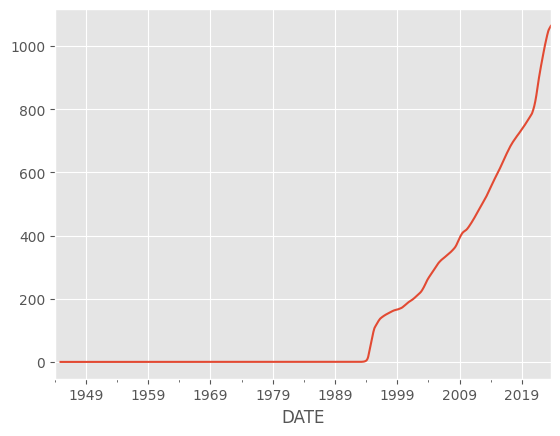

In [ ]:
IGP12_INCC12["VALUE (-)"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP12_INCC12["VALUE (-)"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

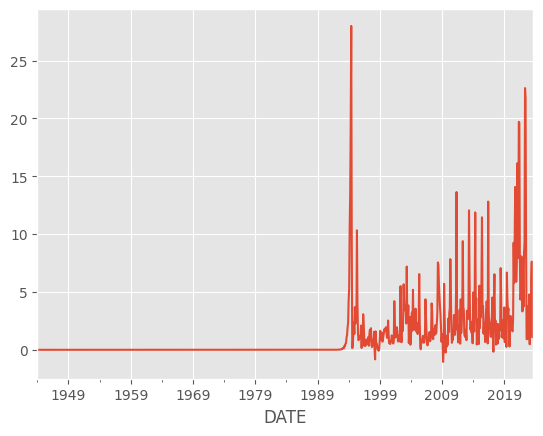

In [ ]:
IGP12_INCC12["VALUE (-)"].diff()

IGP12_INCC12["VALUE (-)"].diff().plot()

Comportamento Sazonal por mês

<Axes: xlabel='DATE'>

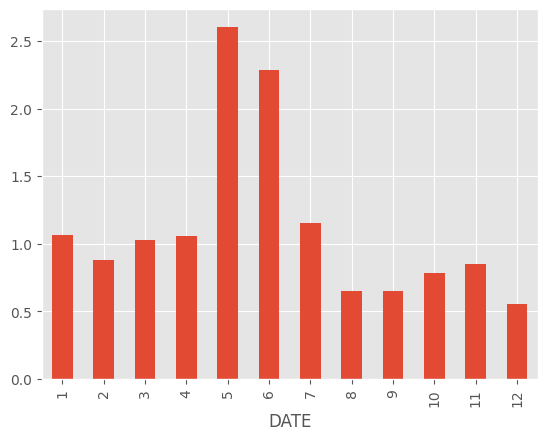

In [ ]:
IGP12_INCC12["VALUE (-)"].diff().groupby(IGP12_INCC12.index.month).mean().plot(kind='bar')

Autocorrelação Total e Parcial

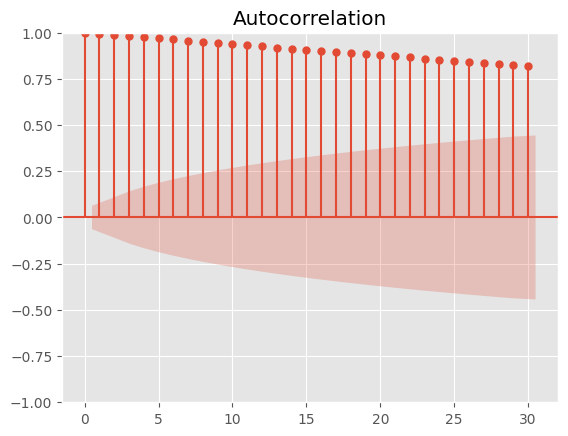

In [ ]:
plot_acf(IGP12_INCC12["VALUE (-)"])
plt.show()

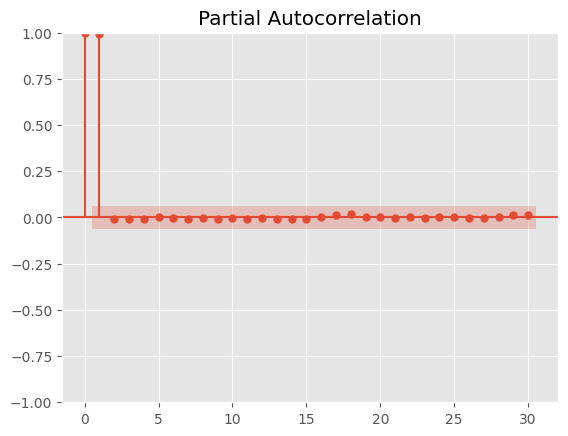

In [ ]:
plot_pacf(IGP12_INCC12["VALUE (-)"])
plt.show()

####IGP12_INCCG12

<Axes: xlabel='DATE'>

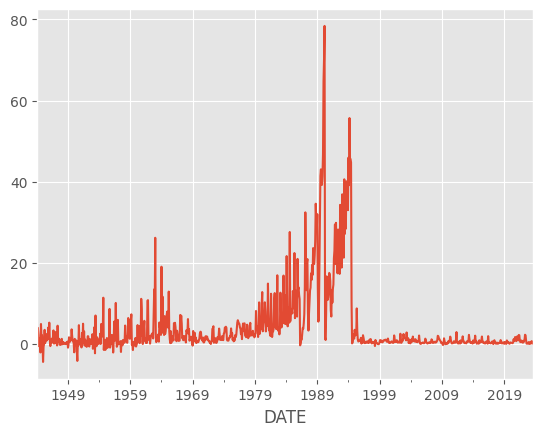

In [ ]:
ip.timeseries("IGP12_INCCG12")
IGP12_INCCG12 = ip.timeseries("IGP12_INCCG12")

IGP12_INCCG12.columns

IGP12_INCCG12["VALUE ((% a.m.))"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

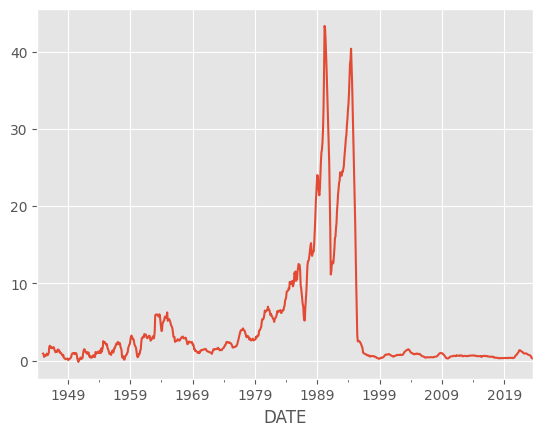

In [ ]:
IGP12_INCCG12["VALUE ((% a.m.))"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP12_INCCG12["VALUE ((% a.m.))"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

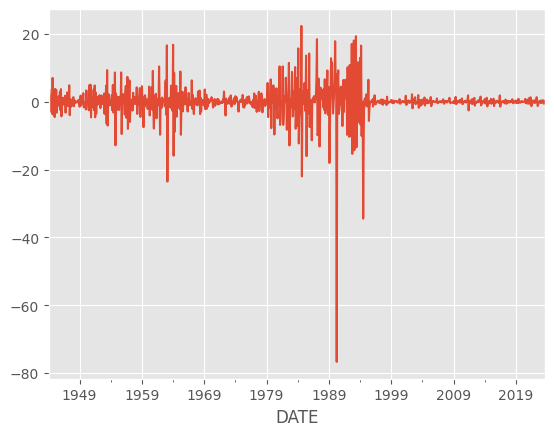

In [ ]:
IGP12_INCCG12["VALUE ((% a.m.))"].diff()

IGP12_INCCG12["VALUE ((% a.m.))"].diff().plot()

Comportamento Sazonal por mês

<Axes: xlabel='DATE'>

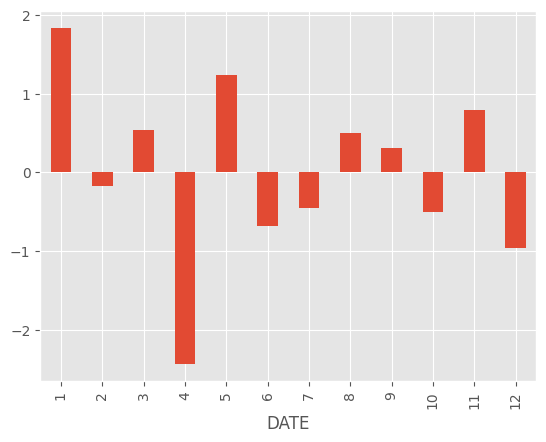

In [ ]:
IGP12_INCCG12["VALUE ((% a.m.))"].diff().groupby(IGP12_INCCG12.index.month).mean().plot(kind='bar')

Autocorrelação Total e Parcial

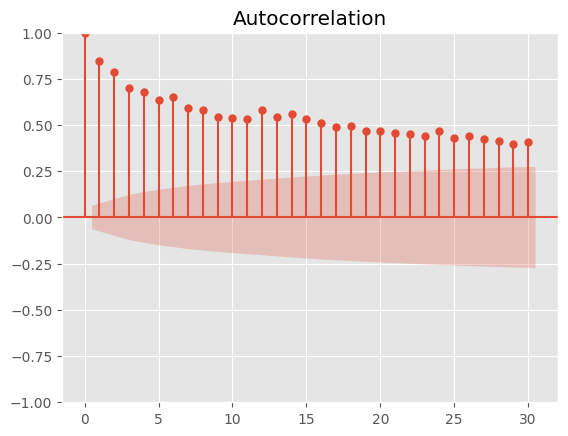

In [ ]:
plot_acf(IGP12_INCCG12["VALUE ((% a.m.))"])
plt.show()

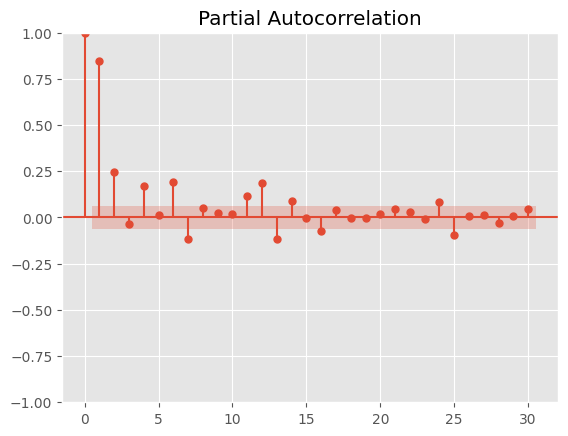

In [ ]:
plot_pacf(IGP12_INCCG12["VALUE ((% a.m.))"])
plt.show()

####IGP12_INCCMG12

<Axes: xlabel='DATE'>

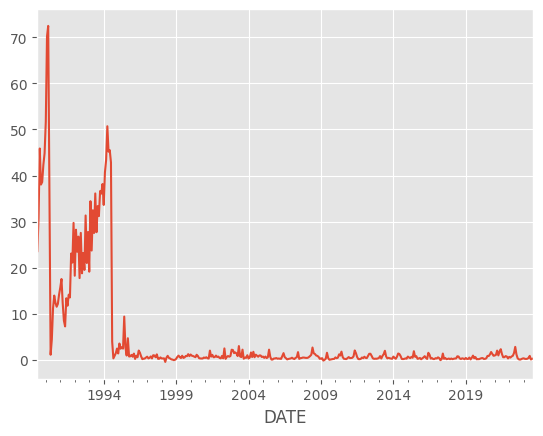

In [ ]:
ip.timeseries("IGP12_INCCMG12")
IGP12_INCCMG12 = ip.timeseries("IGP12_INCCMG12")

IGP12_INCCMG12.columns

IGP12_INCCMG12["VALUE ((% a.m.))"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

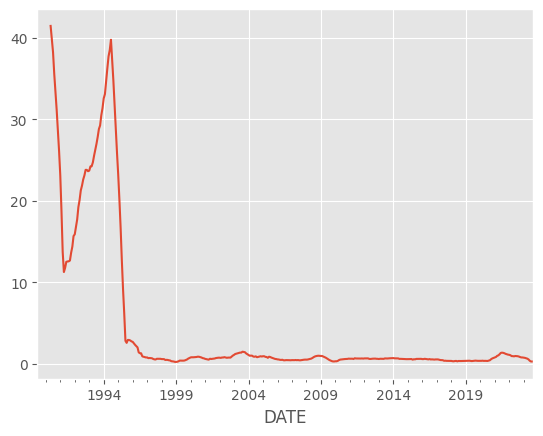

In [ ]:
IGP12_INCCMG12["VALUE ((% a.m.))"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP12_INCCMG12["VALUE ((% a.m.))"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

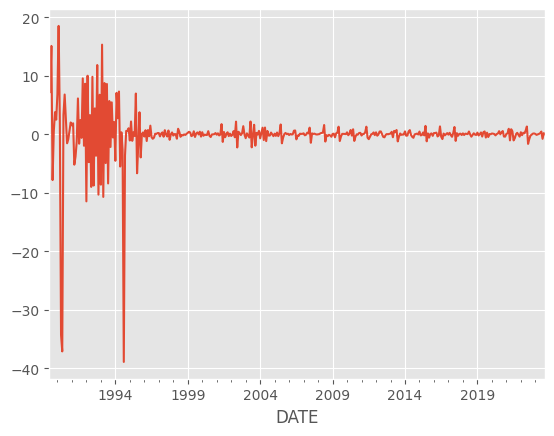

In [ ]:
IGP12_INCCMG12["VALUE ((% a.m.))"].diff()

IGP12_INCCMG12["VALUE ((% a.m.))"].diff().plot()

Comportamento Sazonal por mês

<Axes: xlabel='DATE'>

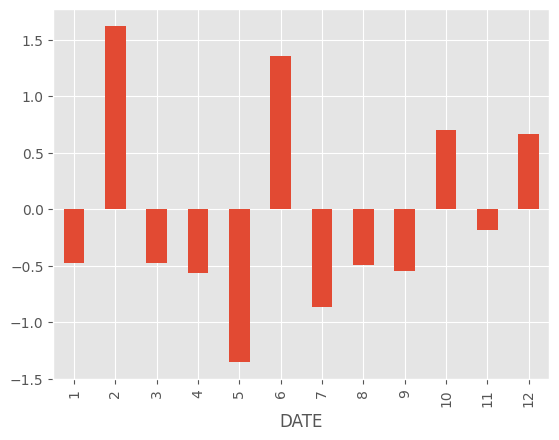

In [ ]:
IGP12_INCCMG12["VALUE ((% a.m.))"].diff().groupby(IGP12_INCCMG12.index.month).mean().plot(kind='bar')

Autocorrelação Total e Parcial

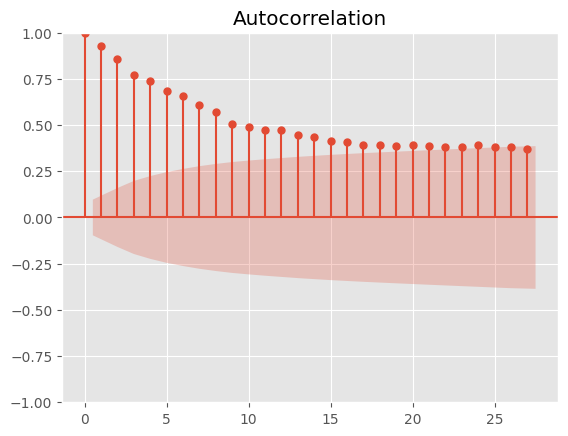

In [ ]:
plot_acf(IGP12_INCCMG12["VALUE ((% a.m.))"])
plt.show()

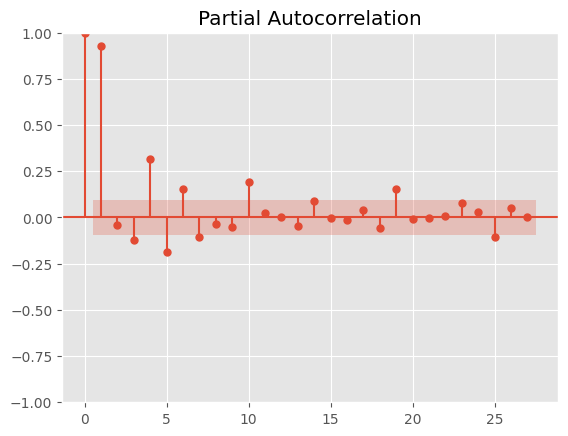

In [ ]:
plot_pacf(IGP12_INCCMG12["VALUE ((% a.m.))"])
plt.show()

####IGP12_INCCMG1D12

<Axes: xlabel='DATE'>

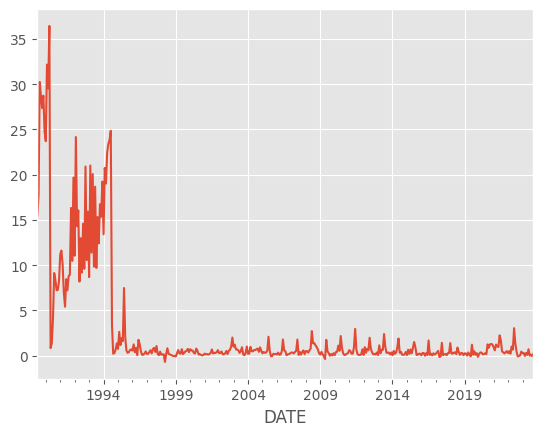

In [ ]:
ip.timeseries("IGP12_INCCMG1D12")
IGP12_INCCMG1D12 = ip.timeseries("IGP12_INCCMG1D12")

IGP12_INCCMG1D12.columns

IGP12_INCCMG1D12["VALUE ((% a.m.))"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

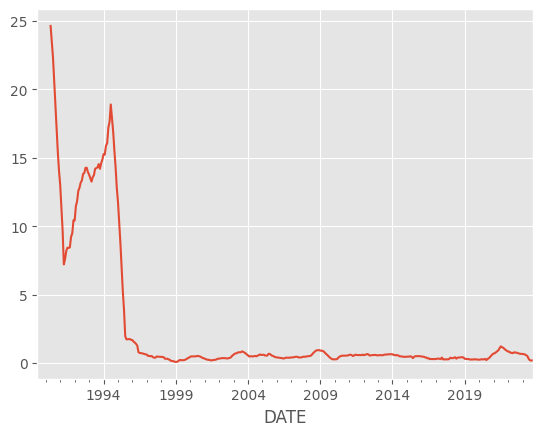

In [ ]:
IGP12_INCCMG1D12["VALUE ((% a.m.))"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP12_INCCMG1D12["VALUE ((% a.m.))"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

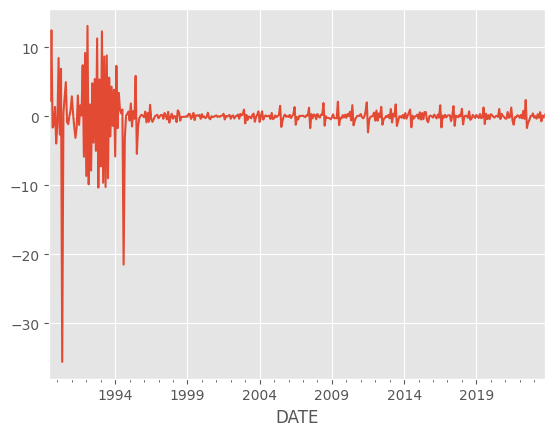

In [ ]:
IGP12_INCCMG1D12["VALUE ((% a.m.))"].diff()

IGP12_INCCMG1D12["VALUE ((% a.m.))"].diff().plot()

Comportamento Sazonal por mês

<Axes: xlabel='DATE'>

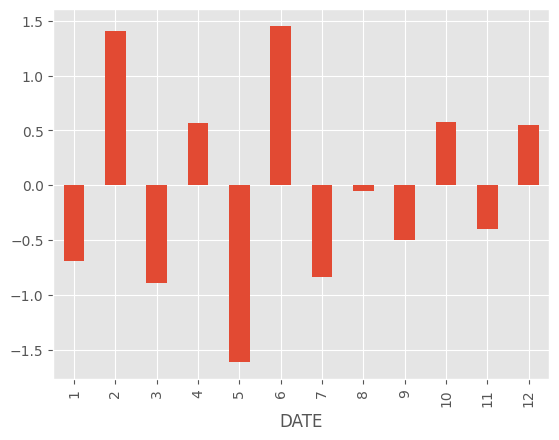

In [ ]:
IGP12_INCCMG1D12["VALUE ((% a.m.))"].diff().groupby(IGP12_INCCMG1D12.index.month).mean().plot(kind='bar')

Autocorrelação Total e Parcial

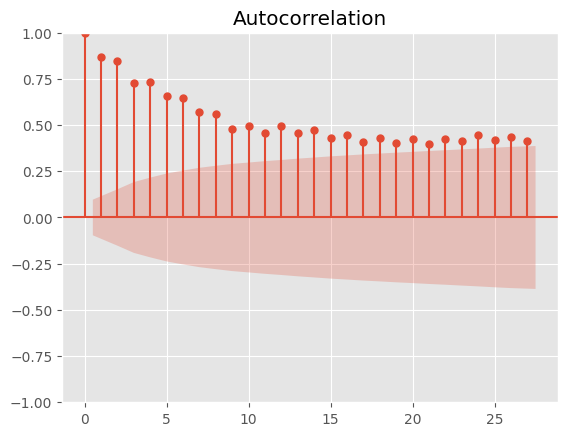

In [ ]:
plot_acf(IGP12_INCCMG1D12["VALUE ((% a.m.))"])
plt.show()

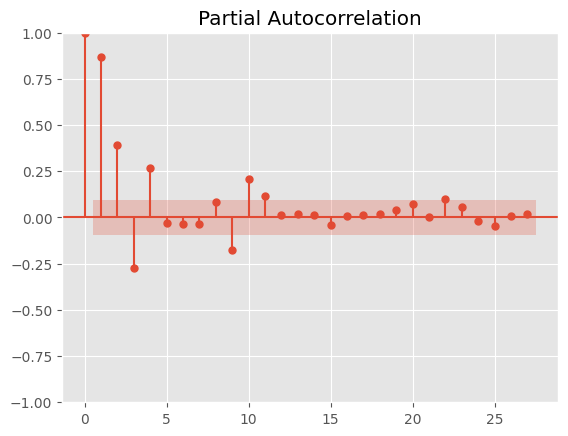

In [ ]:
plot_pacf(IGP12_INCCMG1D12["VALUE ((% a.m.))"])
plt.show()

####IGP12_INCCMG2D12

<Axes: xlabel='DATE'>

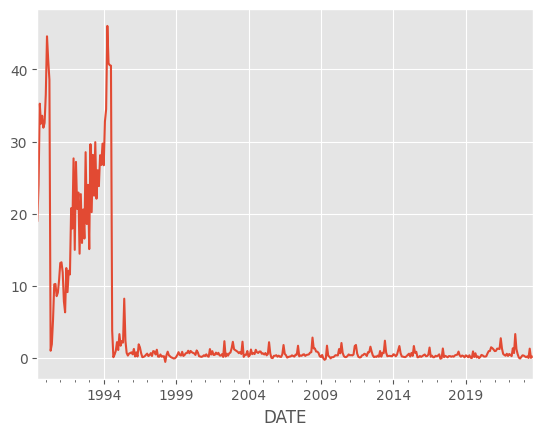

In [ ]:
ip.timeseries("IGP12_INCCMG2D12")
IGP12_INCCMG2D12 = ip.timeseries("IGP12_INCCMG2D12")

IGP12_INCCMG2D12.columns

IGP12_INCCMG2D12["VALUE ((% a.m.))"].plot()

Utilizando Média Movel Simples para 12 periodos (12 meses)

<Axes: xlabel='DATE'>

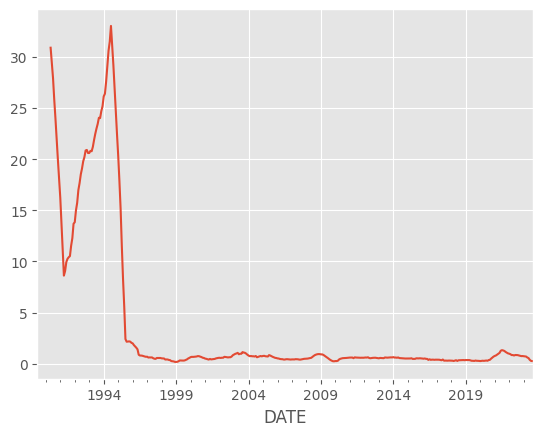

In [ ]:
IGP12_INCCMG2D12["VALUE ((% a.m.))"].rolling(12).mean()
#percebe-se os 12 primeiro nulos, pq so dps do mes 12 conseguimos calcular a média móvel

IGP12_INCCMG2D12["VALUE ((% a.m.))"].rolling(12).mean().plot()

Sazonalidade

<Axes: xlabel='DATE'>

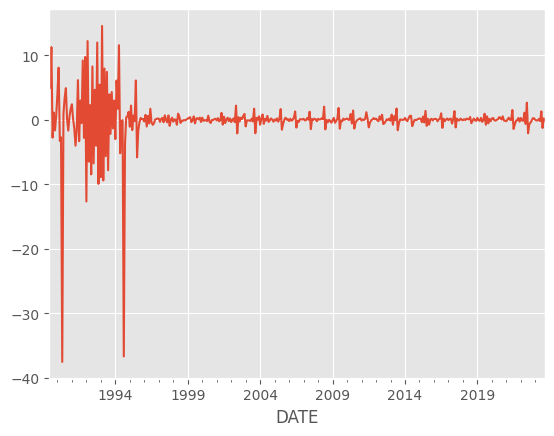

In [ ]:
IGP12_INCCMG2D12["VALUE ((% a.m.))"].diff()

IGP12_INCCMG2D12["VALUE ((% a.m.))"].diff().plot()

Comportamento Sazonal por mês

<Axes: xlabel='DATE'>

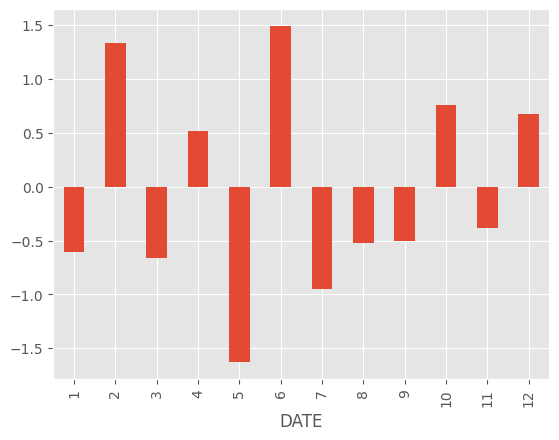

In [ ]:
IGP12_INCCMG2D12["VALUE ((% a.m.))"].diff().groupby(IGP12_INCCMG2D12.index.month).mean().plot(kind='bar')

Autocorrelação Total e Parcial

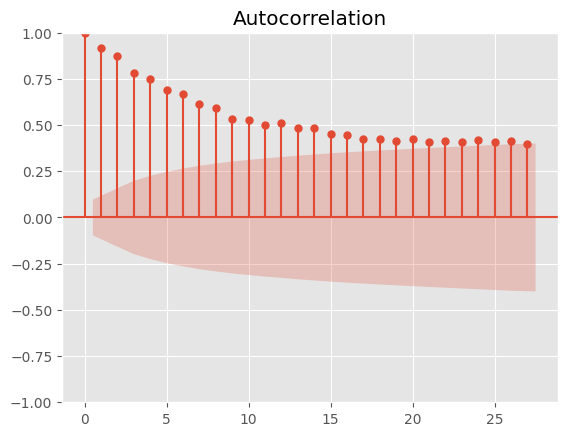

In [ ]:
plot_acf(IGP12_INCCMG2D12["VALUE ((% a.m.))"])
plt.show()

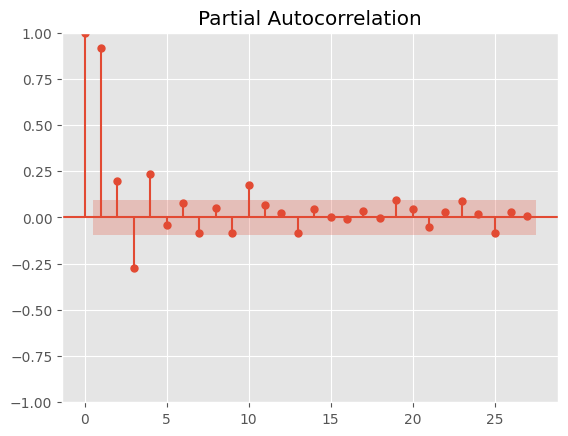

In [ ]:
plot_pacf(IGP12_INCCMG2D12["VALUE ((% a.m.))"])
plt.show()